### Assignment: 

      1. Pick this code (Links to an external site.) 
      2. Add CutOut to this
      3. Use LR Finder to find the best starting learning rate
      4. Use SDG with Momentum
      5. Train for 100 Epochs. 
      6. Keep Verbose = 0 (no logs)
      7. Pring the top accuracy
      8. Show Training and Test Accuracy curves
      9. Run GradCAM on the any 25 misclassified images. Make sure you mention what is the prediction and what was the ground truth label.
      10. Submit





In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2019) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


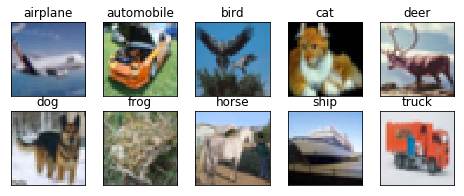

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)        41568     
__________

### Learning rate finder
If we go through this fit_loop method, we can see it takes a callback array. Here we are going to use this callback. To utilize this we are creating a new class LR_Finder inherited from keras Callback. Basically when we will call fit method of our model this fit_loop method will be called.

As loss may up-down a bit we will have scattered plot. In that case we are also calculating a smoother loss using exponentially weighted average and bias correction.

In [11]:
# Mount google drive to store check point model results.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

from keras.callbacks import ModelCheckpoint

# Specify gdrive path to where highest validation accuracy check point results to be stored.
import os 
checkpoint_path = "/content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment11_clr.hdf5"

# Create checkpoint callback
cp_callback = ModelCheckpoint(checkpoint_path,save_best_only=True,monitor='val_loss', mode='min', period=1, verbose=0)

In [0]:
from matplotlib import pyplot as plt
import math
from keras.callbacks import LambdaCallback
import keras.backend as K
import numpy as np


class LRFinder:
    """
    Plots the change of the loss function of a Keras model when the learning rate is exponentially increasing.
    See for details:
    https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0
    """
    def __init__(self, model):
        self.model = model
        self.losses = []
        self.lrs = []
        self.best_loss = 1e9

    def on_batch_end(self, batch, logs):
        # Log the learning rate
        lr = K.get_value(self.model.optimizer.lr)
        self.lrs.append(lr)

        # Log the loss
        loss = logs['loss']
        self.losses.append(loss)

        # Check whether the loss got too large or NaN
        if batch > 5 and (math.isnan(loss) or loss > self.best_loss * 4):
            self.model.stop_training = True
            return

        if loss < self.best_loss:
            self.best_loss = loss

        # Increase the learning rate for the next batch
        lr *= self.lr_mult
        K.set_value(self.model.optimizer.lr, lr)

    def find(self, x_train, y_train, start_lr, end_lr, batch_size=64, epochs=1):
        num_batches = epochs * x_train.shape[0] / batch_size
        self.lr_mult = (float(end_lr) / float(start_lr)) ** (float(1) / float(num_batches))

        # Save weights into a file
        self.model.save_weights('tmp.h5')

        # Remember the original learning rate
        original_lr = K.get_value(self.model.optimizer.lr)

        # Set the initial learning rate
        K.set_value(self.model.optimizer.lr, start_lr)

        callback = LambdaCallback(on_batch_end=lambda batch, logs: self.on_batch_end(batch, logs))

        self.model.fit(x_train, y_train,
                        batch_size=batch_size, epochs=epochs,
                        callbacks=[callback])

        # Restore the weights to the state before model fitting
        self.model.load_weights('tmp.h5')

        # Restore the original learning rate
        K.set_value(self.model.optimizer.lr, original_lr)

    def find_generator(self, generator, start_lr, end_lr, epochs=1, steps_per_epoch=None, **kw_fit):
            if steps_per_epoch is None:
                try:
                    steps_per_epoch = len(generator)
                except (ValueError, NotImplementedError) as e:
                    raise e('`steps_per_epoch=None` is only valid for a'
                            ' generator based on the '
                            '`keras.utils.Sequence`'
                            ' class. Please specify `steps_per_epoch` '
                            'or use the `keras.utils.Sequence` class.')
            self.lr_mult = (float(end_lr) / float(start_lr)) ** (float(1) / float(steps_per_epoch))

            # Save weights into a file
            self.model.save_weights('tmp.h5')

            # Remember the original learning rate
            original_lr = K.get_value(self.model.optimizer.lr)

            # Set the initial learning rate
            K.set_value(self.model.optimizer.lr, start_lr)

            callback = LambdaCallback(on_batch_end=lambda batch,
                                      logs: self.on_batch_end(batch, logs))

            self.model.fit_generator(generator=generator,
                                     epochs=epochs,
                                     steps_per_epoch=steps_per_epoch,
                                     callbacks=[callback],
                                     **kw_fit)

            # Restore the weights to the state before model fitting
            self.model.load_weights('tmp.h5')

            # Restore the original learning rate
            K.set_value(self.model.optimizer.lr, original_lr)

    def plot_loss(self, n_skip_beginning=10, n_skip_end=5):
        """
        Plots the loss.
        Parameters:
            n_skip_beginning - number of batches to skip on the left.
            n_skip_end - number of batches to skip on the right.
        """
        plt.ylabel("loss")
        plt.xlabel("learning rate (log scale)")
        plt.plot(self.lrs[n_skip_beginning:-n_skip_end], self.losses[n_skip_beginning:-n_skip_end])
        plt.xscale('log')

    def plot_loss_change(self, sma=1, n_skip_beginning=10, n_skip_end=5, y_lim=(-0.01, 0.01)):
        """
        Plots rate of change of the loss function.
        Parameters:
            sma - number of batches for simple moving average to smooth out the curve.
            n_skip_beginning - number of batches to skip on the left.
            n_skip_end - number of batches to skip on the right.
            y_lim - limits for the y axis.
        """
        derivatives = self.get_derivatives(sma)[n_skip_beginning:-n_skip_end]
        lrs = self.lrs[n_skip_beginning:-n_skip_end]
        plt.ylabel("rate of loss change")
        plt.xlabel("learning rate (log scale)")
        plt.plot(lrs, derivatives)
        plt.xscale('log')
        plt.ylim(y_lim)

    def get_derivatives(self, sma):
        assert sma >= 1
        derivatives = [0] * sma
        for i in range(sma, len(self.lrs)):
            derivatives.append((self.losses[i] - self.losses[i - sma]) / sma)
        return derivatives

    def get_best_lr(self, sma, n_skip_beginning=10, n_skip_end=5):
        derivatives = self.get_derivatives(sma)
        best_der_idx = np.argmax(derivatives[n_skip_beginning:-n_skip_end])[0]
        return self.lrs[n_skip_beginning:-n_skip_end][best_der_idx]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.9620 - acc: 0.2487 - val_loss: 1.5660 - val_acc: 0.4181
Epoch 2/100
50000/50000 [==============================] - 8s 154us/step - loss: 1.4559 - acc: 0.4626 - val_loss: 1.2161 - val_acc: 0.5587
Epoch 3/100
50000/50000 [==============================] - 8s 154us/step - loss: 1.2088 - acc: 0.5659 - val_loss: 1.0448 - val_acc: 0.6211
Epoch 4/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.0504 - acc: 0.6259 - val_loss: 0.9437 - val_acc: 0.6659
Epoch 5/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.9353 - acc: 0.6733 - val_loss: 0.8098 - val_acc: 0.7155
Epoch 6/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.8504 - acc: 0.7046 - val_loss: 0.7666 - val_acc: 0.7348
Epoch 7/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.7743 - acc: 0.7334 - val_loss: 0.

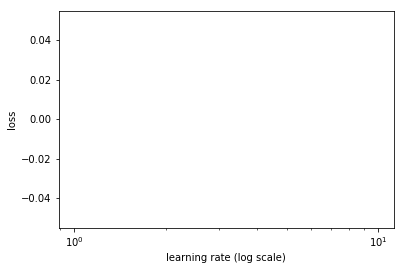

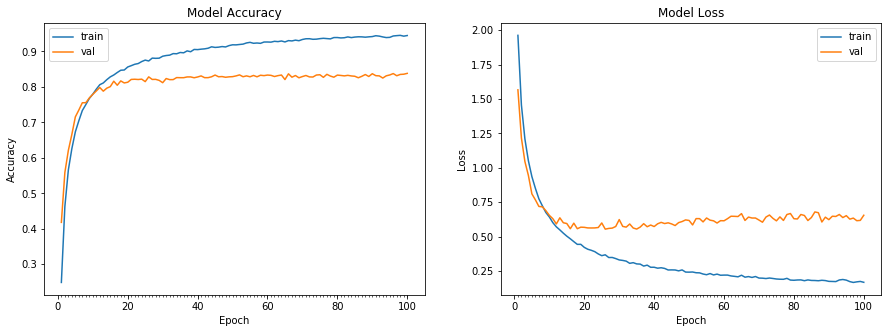

Accuracy on test data is: 83.82


In [0]:
from keras.preprocessing.image import ImageDataGenerator


# Add lr_finder
lr_finder = LR_Finder(start_lr=1e-5, end_lr=1, step_size=np.ceil(train_features.shape[0]/bs))

# train the model
start = time.time()

model_info = model.fit(train_features, train_labels,nb_epoch = 100, batch_size= 256,
           verbose=1, validation_data = (test_features, test_labels) )

# model is a Keras model
lr_finder = LRFinder(model)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(train_features, train_labels, start_lr=0.0001, end_lr=1, batch_size=512, epochs=100)

# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=0, n_skip_end=0)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



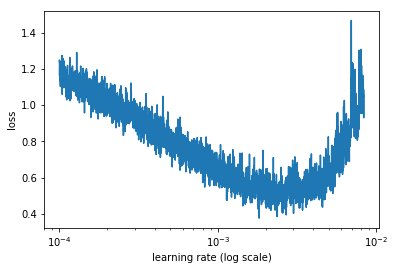

In [0]:
lr_finder.plot_loss(n_skip_beginning=0, n_skip_end=5)

#### LR Finder: From above graph it is evident that when learning rate is between 0.001 to 0.01 loss is minimum. Loss reaches min of 0.4 when learning rate is at 0.003. So, best learning rate for CIFAR10 data set is 0.003 as per this graph.

### Random erasing source code

In [0]:

# 
# Source code for cutoff/randon_eraser

import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser
  

In [0]:
from keras.callbacks import ModelCheckpoint

# Specify gdrive path to where highest validation accuracy check point results to be stored.
import os 
checkpoint_path = "/content/gdrive/My Drive/Colab Notebooks/CIFAR10_assignment11_lr_cutout_sgd.hdf5"

# Create checkpoint callback
cp_callback = ModelCheckpoint(checkpoint_path,save_best_only=True,monitor='val_loss', mode='min', period=1, verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=0, steps_per_epoch=195, epochs=100)`


Model took 2677.09 seconds to train


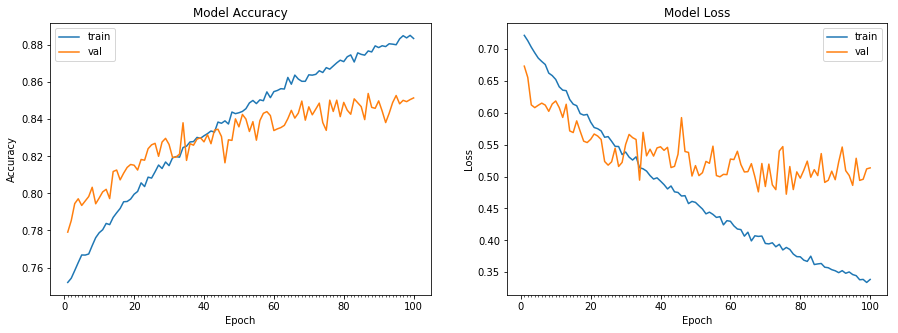

Accuracy on test data is: 85.15
Top validation Accuracy: 0.85


In [110]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

## Random Erasing/cut out in Image augumentation
datagen = ImageDataGenerator(zoom_range=0.2, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(p=0.1, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,v_l=0, v_h=255, pixel_level=True))


# train the model
start = time.time()
# Train the model

sgd = optimizers.SGD(lr=0.003, momentum=0.95, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), callbacks=[cp_callback],
                                 verbose=0) 

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Max validation accuracy
print ("Top validation Accuracy: %0.2f"%max(model_info.history['val_acc']))


In [115]:
# Top validation accuracy
print ("Top validation Accuracy: %0.2f"%(max(model_info.history['val_acc'])*100))


Top validation Accuracy: 85.39


### To find out 25 misclassified images and apply gradCAM from the validation dataset





In [0]:
# loading model weights
model.load_weights(checkpoint_path)

In [0]:
# create predicted labels
pred_classes = model.predict_classes(test_features)
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [63]:
y=testY.reshape((testY.shape[0]))

print ()
print (y[:36])
print (pred_classes[:36])


[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6 6 5 4 5 9 2]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5 2 5 9 3]


In [0]:
# Since testY in n-d arry convert it into 1d array.
test_Y = testY.reshape((testY.shape[0]))

In [52]:
# mis-classification class labels
misclassified_label_indices = list(np.nonzero(pred_classes != test_Y))
print(misclassified_label_indices[:25])

[array([  24,   32,   35, ..., 9985, 9989, 9996])]


In [65]:
pred_class_labels = pred_classes [misclassified_label_indices]
print (label_names[test_labels[0]]); print(test_labels[:25])
print (label_names[pred_classes[0]]); print(pred_class_labels[:25])

dog
[5 4 2 0 7 3 3 9 1 5 2 2 0 5 2 9 3 2 0 5 2 8 0 9 5]
cat
[4 2 3 7 5 6 5 0 8 7 7 6 8 6 5 8 5 5 7 2 0 0 8 0 3]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

Class Idx:4, TP:dog FP:deer 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


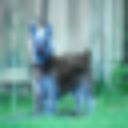

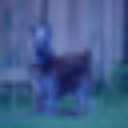

Class Idx:2, TP:deer FP:bird 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


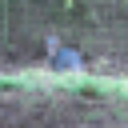

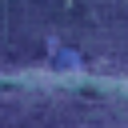

Class Idx:3, TP:bird FP:cat 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


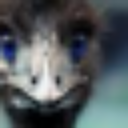

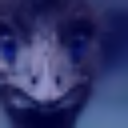

Class Idx:7, TP:airplane FP:horse 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


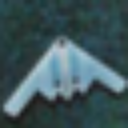

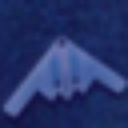

Class Idx:5, TP:horse FP:dog 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


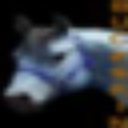

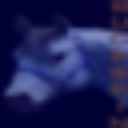

Class Idx:6, TP:cat FP:frog 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


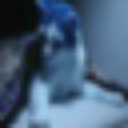

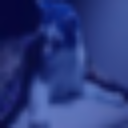

Class Idx:5, TP:cat FP:dog 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


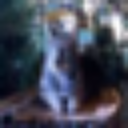

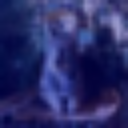

Class Idx:0, TP:truck FP:airplane 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


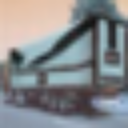

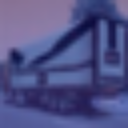

Class Idx:8, TP:automobile FP:ship 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


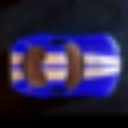

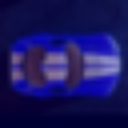

Class Idx:7, TP:dog FP:horse 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


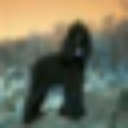

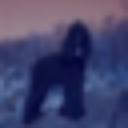

Class Idx:7, TP:bird FP:horse 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


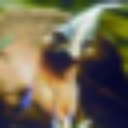

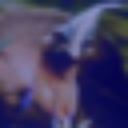

Class Idx:6, TP:bird FP:frog 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


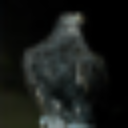

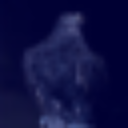

Class Idx:8, TP:airplane FP:ship 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


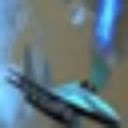

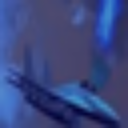

Class Idx:6, TP:dog FP:frog 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


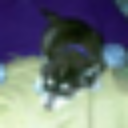

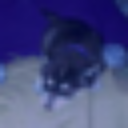

Class Idx:5, TP:bird FP:dog 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


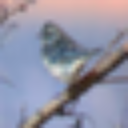

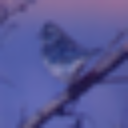

Class Idx:8, TP:truck FP:ship 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


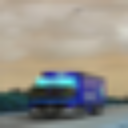

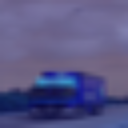

Class Idx:5, TP:cat FP:dog 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


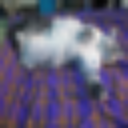

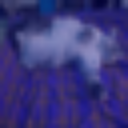

Class Idx:5, TP:bird FP:dog 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


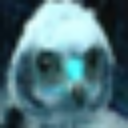

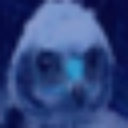

Class Idx:7, TP:airplane FP:horse 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


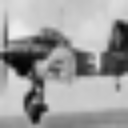

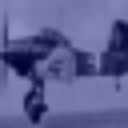

Class Idx:2, TP:dog FP:bird 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


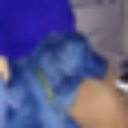

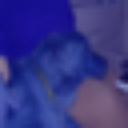

Class Idx:0, TP:bird FP:airplane 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


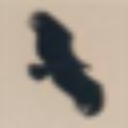

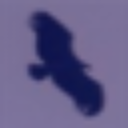

Class Idx:0, TP:ship FP:airplane 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


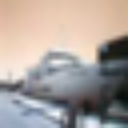

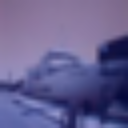

Class Idx:8, TP:airplane FP:ship 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


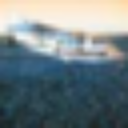

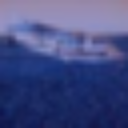

Class Idx:0, TP:truck FP:airplane 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


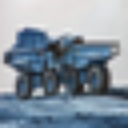

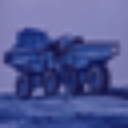

Class Idx:3, TP:dog FP:cat 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


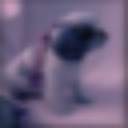

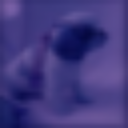

In [66]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

# Define cifar10 labels
label_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


# cv2.imshow() is deprecated/crashed in jupyter, I used cv2_imshow() for colab
from google.colab.patches import cv2_imshow

gradcam_test_features = testX[misclassified_label_indices]
test_labels = test_Y[misclassified_label_indices]
pred_class_labels = pred_classes [misclassified_label_indices]


for idx in range(25):
  
  img = gradcam_test_features[idx]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x.astype('float32')/255
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  
  
  last_conv_layer = model.get_layer("conv2d_12")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]


  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  print("Class Idx:%d, TP:%s FP:%s "%(class_idx,label_names[test_labels[idx]],label_names[pred_class_labels[idx]]))
  # Resizing test image samples and superimposed image samples from 32,32,3 to 128,128,3
  large_img = new_image = cv2.resize(img,(128,128))
  cv2_imshow(large_img)
  
  large_superimposed_img = cv2.resize(superimposed_img,(128,128))
  cv2_imshow(large_superimposed_img)
  